In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10,6)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("fill_scout.csv")

In [3]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.0,80000.0,83450.0
Type,Used,Used,Used
Paint Type,Metallic,Metallic,Metallic
Gearing Type,Automatic,Automatic,Automatic
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."


In [4]:
def fill_most(df, group_col, col_name) :
    for group in list(df[group_col].unique()) :
        cond = df[group_col] == group
        mode = list(df[cond][col_name].mode())
        if mode != [] :
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
    print('Number of NaN : ', df[col_name].isnull().sum())
    print('--------------------')
    print(df[col_name].value_counts(dropna = False))

In [6]:
def fill(df, group_col1, group_col2, col_name, method):
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [7]:
df.shape

(15919, 26)

In [8]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Nr_of_Doors', 'Nr_of_Seats',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

# km

In [9]:
df.km.describe()

count     15919.000000
mean      32082.290954
std       36975.782301
min           0.000000
25%        1906.500000
50%       20407.000000
75%       46898.500000
max      317000.000000
Name: km, dtype: float64

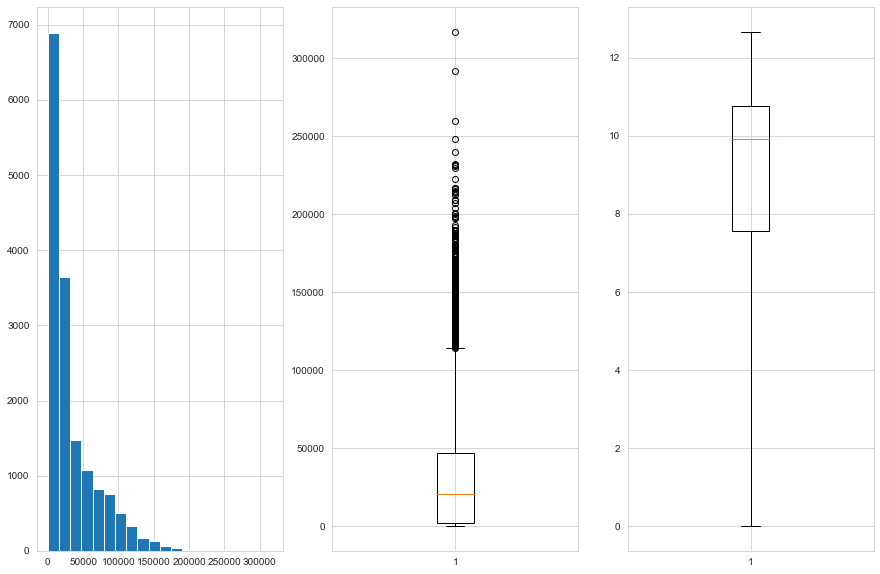

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.hist(df.km, bins = 20)

plt.subplot(132)
plt.boxplot(df.km)

plt.subplot(133)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()

In [11]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Nr_of_Doors', 'Nr_of_Seats',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

# cons_comb

In [12]:
df.cons_comb.describe()

count    15919.000000
mean         4.833463
std          0.867458
min          3.000000
25%          4.100000
50%          4.800000
75%          5.400000
max          9.100000
Name: cons_comb, dtype: float64

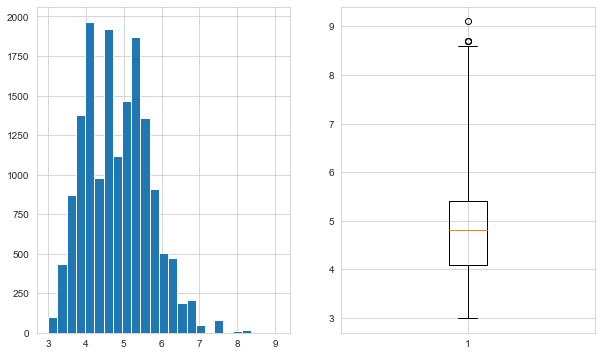

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_comb,whis=2.5)

plt.show()

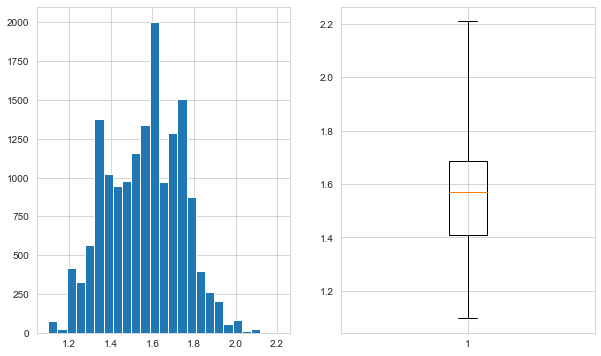

In [14]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(np.log(df.cons_comb), bins = 25)

plt.subplot(122)
plt.boxplot(np.log(df.cons_comb), whis = 2)

plt.show()

In [15]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Nr_of_Doors', 'Nr_of_Seats',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

# Displacement_cc

In [16]:
df.Displacement_cc.describe()

count    15919.000000
mean      1425.609335
std        329.720022
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Displacement_cc, dtype: float64

In [17]:
df.sort_values(by = ['Displacement_cc'], ascending = False)['Displacement_cc'].head(5)

10932    16000.0
7169     15898.0
10771     2967.0
3595      2480.0
3587      2480.0
Name: Displacement_cc, dtype: float64

In [18]:
df.sort_values(by = ['Displacement_cc'], ascending = True).Displacement_cc.head(5)

12790    1.0
14319    1.0
14315    1.0
12849    1.0
12848    1.0
Name: Displacement_cc, dtype: float64

In [19]:
outlier_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])
outlier_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [20]:
df.loc[outlier_list, 'Displacement_cc'] = np.nan

In [21]:
fill(df,"make_model","body_type","Displacement_cc","mode")

Number of NaN :  0
------------------
1598.0    5077
999.0     2467
1398.0    1388
1399.0     772
1461.0     682
1229.0     678
1956.0     670
1490.0     559
1422.0     467
1197.0     372
898.0      351
1395.0     320
1968.0     301
1149.0     288
1618.0     212
1798.0     210
1498.0     196
1600.0     130
1248.0     110
1997.0     103
1364.0     102
1400.0      90
998.0       72
1500.0      50
2000.0      46
1000.0      40
1998.0      25
2480.0      20
1984.0      18
1200.0      18
1397.0      11
899.0       11
929.0        5
1499.0       5
997.0        4
900.0        4
1596.0       4
1599.0       3
1396.0       3
1199.0       3
1589.0       2
1300.0       2
1495.0       2
995.0        2
890.0        1
1333.0       1
1580.0       1
1995.0       1
1533.0       1
1100.0       1
1198.0       1
1496.0       1
1368.0       1
1896.0       1
1584.0       1
1568.0       1
996.0        1
1696.0       1
1686.0       1
973.0        1
1856.0       1
1239.0       1
1350.0       1
1369.0       1
13

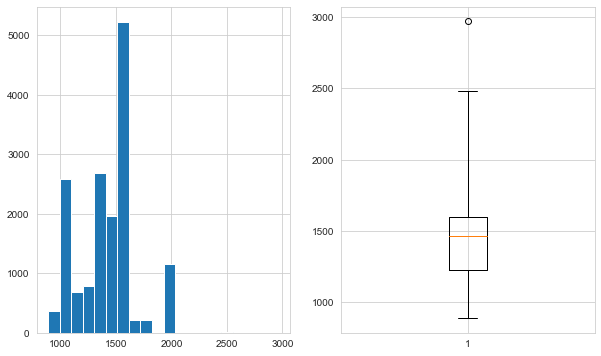

In [22]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis = 2.5)

plt.show()

In [23]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Nr_of_Doors', 'Nr_of_Seats',
       'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb',
       'CO2_Emission'],
      dtype='object')

# Nr_of_Doors

In [24]:
df.Nr_of_Doors.describe()

count    15919.000000
mean         4.660657
std          0.642198
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: Nr_of_Doors, dtype: float64

In [25]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace = True)

In [26]:
df.Nr_of_Doors.value_counts(dropna=False)

5.0    11787
4.0     3079
3.0      832
2.0      219
NaN        2
Name: Nr_of_Doors, dtype: int64

In [27]:
fill(df, 'make_model', 'body_type', 'Nr_of_Doors', 'mode')

Number of NaN :  0
------------------
5.0    11789
4.0     3079
3.0      832
2.0      219
Name: Nr_of_Doors, dtype: int64


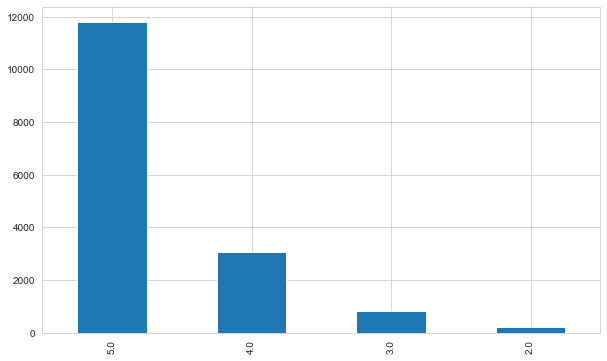

In [28]:
df.Nr_of_Doors.value_counts(dropna=False).plot.bar();

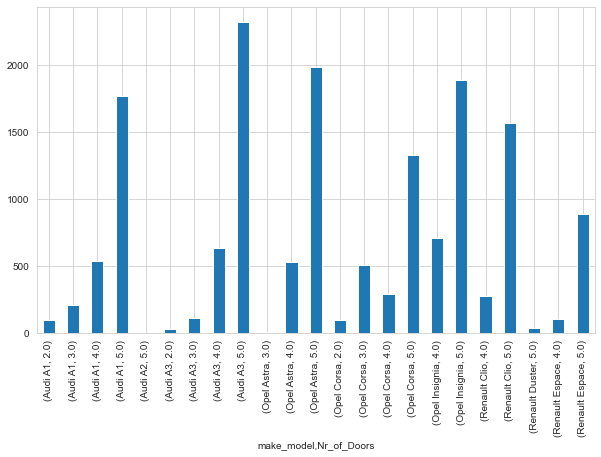

In [29]:
df.groupby(['make_model', 'Nr_of_Doors']).Nr_of_Doors.count().plot.bar();

In [30]:
df.drop("Nr_of_Doors",axis=1,inplace=True)

In [31]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Nr_of_Seats', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# Nr_of_Seats

In [32]:
df.Nr_of_Seats.describe()

count    15919.000000
mean         4.952258
std          0.476599
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: Nr_of_Seats, dtype: float64

In [33]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace = True)

In [34]:
df.Nr_of_Seats.value_counts(dropna=False)

5.0    14308
4.0     1127
7.0      362
2.0      119
NaN        3
Name: Nr_of_Seats, dtype: int64

In [35]:
fill(df, 'make_model', 'body_type', 'Nr_of_Seats', 'mode')

Number of NaN :  0
------------------
5.0    14311
4.0     1127
7.0      362
2.0      119
Name: Nr_of_Seats, dtype: int64


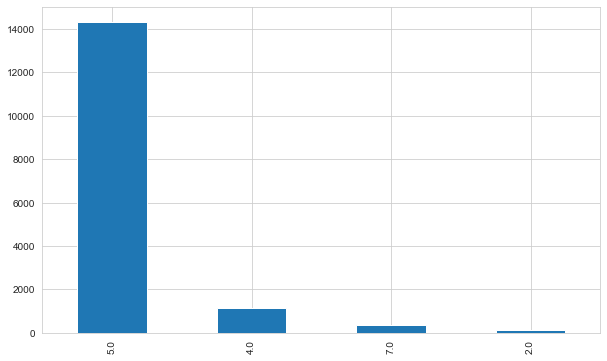

In [36]:
df.Nr_of_Seats.value_counts(dropna=False).plot.bar();

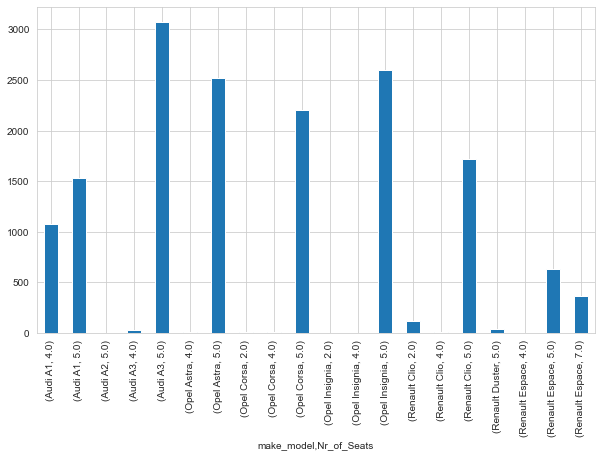

In [37]:
df.groupby(['make_model', 'Nr_of_Seats']).Nr_of_Seats.count().plot.bar();

In [38]:
df.drop('Nr_of_Seats', axis = 1, inplace = True)

In [39]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_chain', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# Weight_kg

In [40]:
df.Weight_kg.describe()

count    15919.000000
mean      1337.432251
std        200.466210
min          1.000000
25%       1165.000000
50%       1295.000000
75%       1472.000000
max       2471.000000
Name: Weight_kg, dtype: float64

In [41]:
df.Weight_kg.sort_values().head(10)

8355       1.0
12779      1.0
1143     102.0
8857     840.0
14313    900.0
13513    977.0
13555    977.0
14654    980.0
14105    980.0
13999    980.0
Name: Weight_kg, dtype: float64

In [42]:
df.Weight_kg.sort_values().tail(10)

15143    2410.0
15136    2410.0
15133    2410.0
10638    2450.0
10646    2450.0
14975    2471.0
15678    2471.0
15185    2471.0
15231    2471.0
15280    2471.0
Name: Weight_kg, dtype: float64

In [43]:
df.Weight_kg.replace([1,102],np.nan,inplace=True)

In [44]:
df.Weight_kg.isnull().sum()

3

In [45]:
fill(df,"make_model","body_type","Weight_kg","mode")

Number of NaN :  0
------------------
1163.0    1583
1360.0    1419
1487.0     967
1135.0     837
1425.0     744
1180.0     695
1273.0     656
1165.0     603
1503.0     561
1734.0     556
1087.0     291
1335.0     242
1365.0     211
1199.0     205
1350.0     156
1119.0     153
1355.0     136
1280.0     127
1260.0     127
1275.0     112
1278.0     110
1255.0     108
1200.0     107
1522.0     103
1659.0     102
1195.0      96
1120.0      93
1403.0      91
1701.0      87
1250.0      85
1685.0      83
1441.0      82
1308.0      80
1285.0      80
1613.0      75
1110.0      75
1279.0      72
1364.0      70
1345.0      67
1733.0      65
1071.0      64
1141.0      64
1209.0      64
1325.0      64
1230.0      63
1845.0      56
1090.0      54
1052.0      53
1154.0      52
1664.0      52
1513.0      51
1065.0      50
1237.0      49
1440.0      46
1205.0      46
1088.0      46
1265.0      45
1395.0      44
1666.0      43
1585.0      43
1134.0      42
1162.0      42
1248.0      40
1393.0      40
12

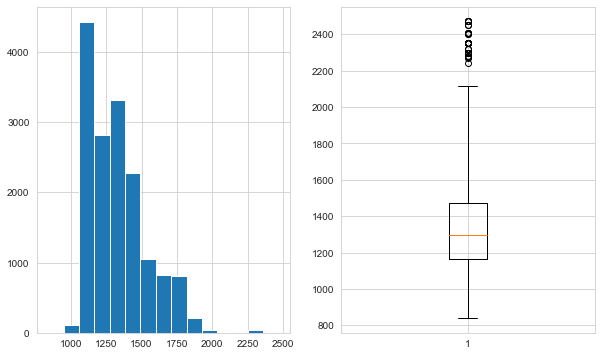

In [46]:
plt.subplot(121)
plt.hist(df.Weight_kg, bins = 15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis = 2.5 )

plt.show()

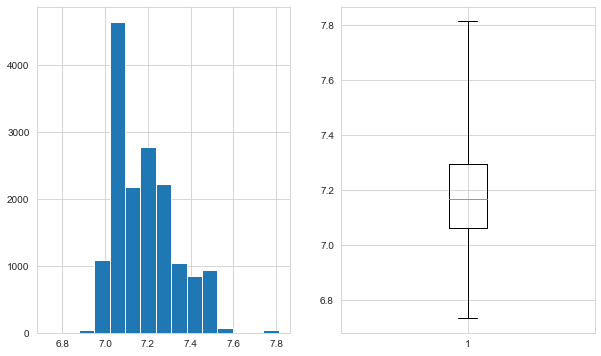

In [47]:
plt.subplot(121)
plt.hist(np.log(df.Weight_kg), bins = 15)

plt.subplot(122)
plt.boxplot(np.log(df.Weight_kg), whis = 2.5)

plt.show()

In [48]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_chain', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# hp_kw

In [49]:
df.hp_kw.describe()

count    15919.000000
mean        88.373893
std         26.844440
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp_kw, dtype: float64

In [50]:
df.hp_kw.sort_values().head(30)

6034      1.0
6946      1.0
7014      1.0
9285      1.0
9287      1.0
6005      1.0
9288      1.0
7018      1.0
9289      1.0
9290      1.0
9292      1.0
9299      1.0
10610     1.0
10580     1.0
10579     1.0
10468     1.0
15155     1.0
15156     1.0
7019      1.0
7016      1.0
13885     4.0
3913      9.0
8857     40.0
13759    40.0
8408     44.0
10282    51.0
10283    51.0
10284    51.0
10285    51.0
10286    51.0
Name: hp_kw, dtype: float64

In [51]:
df.hp_kw.sort_values().tail(10)

3610    294.0
3587    294.0
3599    294.0
3590    294.0
3598    294.0
3596    294.0
3595    294.0
3593    294.0
3648    294.0
3606    294.0
Name: hp_kw, dtype: float64

In [52]:
df.hp_kw.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  51.,  44.,  55.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [53]:
df.hp_kw.loc[df.hp_kw < 40] = np.nan

In [54]:
fill(df,"make_model","body_type","hp_kw","mode")

Number of NaN :  0
------------------
85.0     2544
66.0     2124
81.0     1403
100.0    1317
110.0    1117
70.0      890
125.0     715
51.0      703
55.0      589
118.0     552
92.0      466
121.0     392
147.0     380
77.0      353
56.0      295
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
120.0       8
104.0       8
112.0       7
191.0       7
155.0       6
117.0       6
184.0       5
65.0        4
76.0        4
90.0        4
98.0        3
168.0       3
149.0       3
80.0        3
93.0        3
143.0       2
86.0        2
140.0       2
150.0       2
228.0       2
270.0       2
53.0        2
167.0       2
63.0        2
40.0        2
127.0       2
89.0        2
123.0       1
84.0        1
239.0     

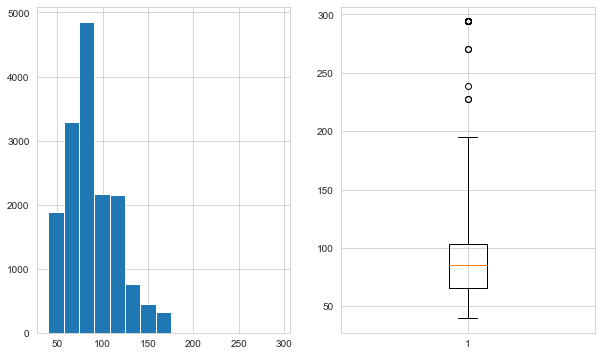

In [55]:
plt.subplot(121)
plt.hist(df.hp_kw, bins = 15)

plt.subplot(122)
plt.boxplot(df.hp_kw, whis = 2.5)

plt.show()

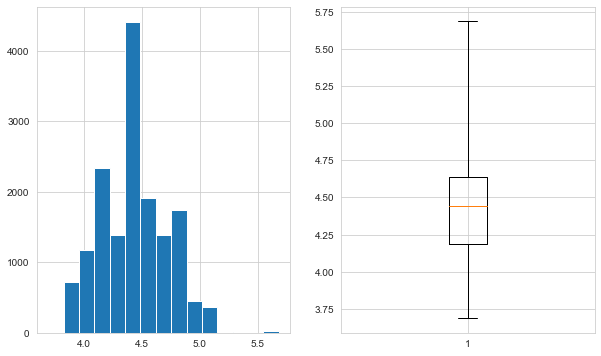

In [56]:
plt.subplot(121)
plt.hist(np.log(df.hp_kw), bins = 15)

plt.subplot(122)
plt.boxplot(np.log(df.hp_kw), whis = 2.5)

plt.show()

In [57]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_chain', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# CO2_Emission

In [58]:
df.CO2_Emission.describe()

count    15919.000000
mean       115.576607
std        250.192021
min          0.000000
25%        104.000000
50%        116.000000
75%        128.000000
max      14457.000000
Name: CO2_Emission, dtype: float64

In [59]:
df.CO2_Emission.sort_values().head(10)

8217     0.0
10566    0.0
12905    1.0
5863     1.0
4015     1.0
4016     1.0
4023     1.0
7621     1.0
3669     1.0
5826     1.0
Name: CO2_Emission, dtype: float64

In [60]:
df.CO2_Emission.sort_values().tail(10)

10513      253.0
535        331.0
4556       990.0
4089      1060.0
5818     12087.0
6579     12087.0
6578     12087.0
8542     12324.0
12343    13983.0
11888    14457.0
Name: CO2_Emission, dtype: float64

In [61]:
df.CO2_Emission.value_counts().sort_index()

0.0          2
1.0         84
5.0          3
8.0         25
9.0        198
10.0       477
11.0       171
13.0       100
14.0        59
15.0        28
16.0         2
17.0        25
36.0         3
45.0         1
51.0         1
80.0         1
84.0         2
85.0       275
87.0         6
88.0        15
89.0        19
90.0        54
91.0        31
93.0        66
94.0        37
95.0       161
96.0        22
97.0       539
98.0       366
99.0       546
100.0       36
101.0      105
103.0      445
104.0      679
105.0      202
106.0      674
107.0      362
108.0      362
109.0      234
110.0      289
111.0      237
112.5        1
113.0      235
114.0      556
115.0       86
116.0      157
116.5        3
117.0      460
118.0      314
119.0      508
120.0      836
121.0       82
123.0      410
124.0      516
125.0      133
126.0      284
127.0      257
128.0      329
129.0      333
130.0      189
131.0       48
133.0      330
134.0      130
135.0      202
136.0      145
137.0      135
138.0     

In [62]:
df.groupby(['make_model', 'body_type', 'CO2_Emission']).price.describe()

count          mean           std  \
make_model     body_type     CO2_Emission                                      
Audi A1        Compact       1.0             1.0  20881.000000           NaN   
                             9.0             1.0  12479.000000           NaN   
                             10.0          147.0  16946.870748   2850.063119   
                             11.0           25.0  19960.360000   2676.261601   
                             14.0            2.0  28750.000000    268.700577   
                             90.0            1.0  12880.000000           NaN   
                             91.0            5.0  13038.000000   1108.927410   
                             94.0            5.0  13960.000000   1232.071427   
                             97.0          113.0  15449.592920   2445.754651   
                             98.0           33.0  16574.363636   2637.086518   
                             99.0           19.0  16043.947368   2257.402993   
                             100.0           4.0  16127.500000   1583.400876   
                             103.0          30.0  21233.033333   1794.550611   
                             104.0         218.0  17712.233945   3766.507902   
                             105.0          14.0  22234.857143    812.264248   
                             106.0          43.0  19831.790698   3335.793270   
                             107.0          13.0  16527.692308   1620.412262   
                             108.0          42.0  23587.095238   3375.692513   
                             109.0          34.0  17029.323529   2514.314097   
                             110.0          51.0  26340.372549   2434.737981   
                             111.0         138.0  23765.282609   3477.921290   
                             113.0           5.0  20388.000000   2796.188477   
                             114.0           1.0  15490.000000           NaN   
                             115.0           7.0  24067.857143   6950.649764   
                             116.0          20.0  23580.950000   2813.102847   
                             117.0           8.0  19094.875000   2942.954077   
                             118.0           2.0  13615.000000     91.923882   
                             119.0           1.0  12550.000000           NaN   
                             120.0          27.0  15850.000000      0.000000   
                             121.0           2.0  18710.000000   3224.406922   
                             123.0          17.0  19308.647059   3816.070049   
                             126.0           1.0  19999.000000           NaN   
                             127.0           2.0  19888.000000      0.000000   
                             134.0           2.0  22495.000000    841.457070   
                             136.0           2.0  29088.000000    128.693434   
                             137.0           2.0  28660.000000    282.842712   
                             331.0           1.0  12990.000000           NaN   
               Coupe         97.0            2.0  14925.000000   1378.858223   
               Sedans        9.0            42.0  15764.547619   1578.276402   
                             10.0          198.0  17497.909091   2518.189324   
                             11.0           42.0  19247.595238   2058.248238   
                             89.0            4.0  16572.500000    288.140591   
                             90.0            3.0  14396.333333    532.381755   
                             91.0           14.0  14228.500000   1438.926670   
                             94.0           12.0  15710.000000   2522.329371   
                             95.0            2.0  13070.000000   2305.168107   
                             97.0          315.0  14905.857143   1996.269548   
                             98.0          281.0  19054.839858   4194.045988   
                             99.0          

In [63]:
cond = ((df.CO2_Emission < 52) | (df.CO2_Emission > 330))
df.loc[cond, 'CO2_Emission'] = np.nan

In [64]:
fill(df,"make_model","body_type","CO2_Emission","median")

Number of NaN :  0
------------------
120.0    842
99.0     828
106.0    756
104.0    681
139.0    633
114.0    630
117.0    598
119.0    582
124.0    559
97.0     539
103.0    453
129.0    434
123.0    430
105.0    379
98.0     366
108.0    362
107.0    362
118.0    357
133.0    348
128.0    329
110.0    297
126.0    284
85.0     275
127.0    257
111.0    237
113.0    235
109.0    234
140.0    221
135.0    202
130.0    189
150.0    174
143.0    171
95.0     161
116.0    157
141.0    156
136.0    145
137.0    135
125.0    133
134.0    130
145.0    126
149.0    117
153.0    113
147.0    109
101.0    105
115.0     86
121.0     82
138.0     75
93.0      66
168.0     58
90.0      54
131.0     48
148.0     48
154.0     40
144.0     40
94.0      37
100.0     36
146.0     36
151.0     34
186.0     32
91.0      31
187.0     26
96.0      22
89.0      19
189.0     19
157.0     18
164.0     17
158.0     17
169.0     15
88.0      15
156.0     14
170.0     10
161.0     10
155.0      8
175.0      8


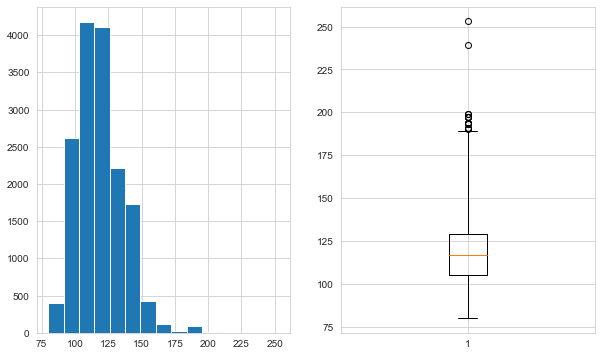

In [65]:
plt.subplot(121)
plt.hist(df.CO2_Emission, bins = 15)

plt.subplot(122)
plt.boxplot(df.CO2_Emission, whis = 2.5)

plt.show()

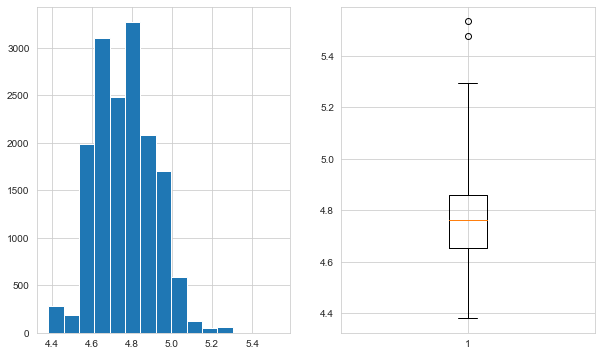

In [66]:
plt.subplot(121)
plt.hist(np.log(df.CO2_Emission), bins = 15)

plt.subplot(122)
plt.boxplot(np.log(df.CO2_Emission), whis = 2.5)

plt.show()

In [67]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_chain', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# price

In [68]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [69]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [70]:
df.price.sort_values().tail(5)

15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, dtype: int64

In [71]:
df.drop(index=[8594,8828,6066,8829],axis=0,inplace=True)

In [72]:
df.reset_index(drop = True, inplace = True)

In [73]:
df.shape

(15915, 24)

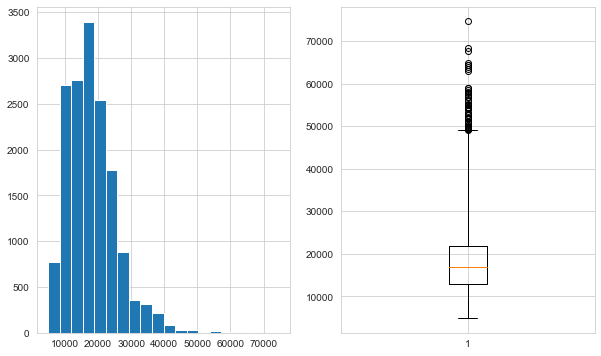

In [74]:
plt.subplot(121)
plt.hist(df.price, bins = 20)

plt.subplot(122)
plt.boxplot(df.price, whis = 3)

plt.show()

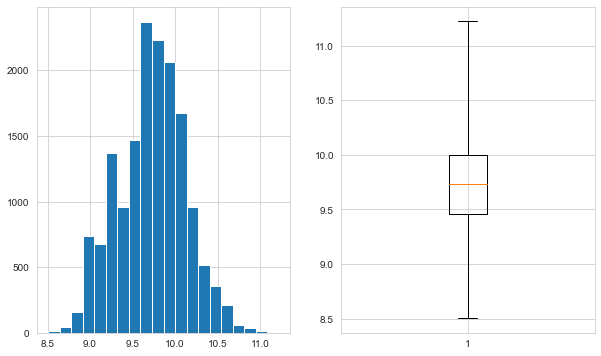

In [75]:
plt.subplot(121)
plt.hist(np.log(df.price), bins = 20)

plt.subplot(122)
plt.boxplot(np.log(df.price), whis = 3)

plt.show()

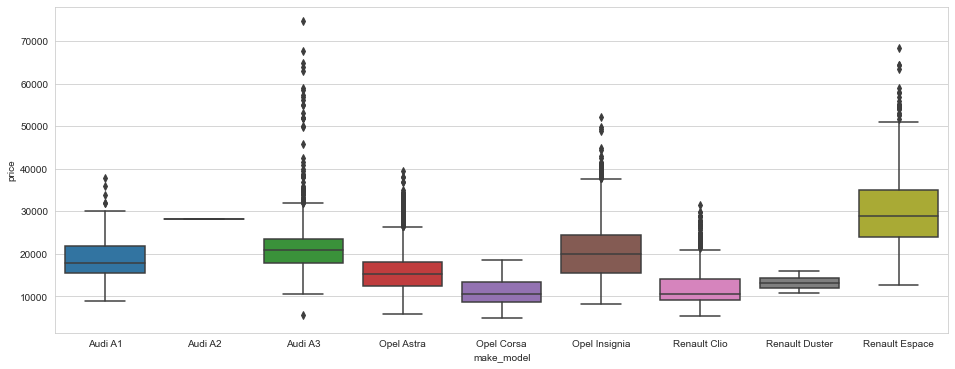

In [76]:
plt.figure(figsize=(16,6))

sns.boxplot(data=df,x="make_model",y="price");

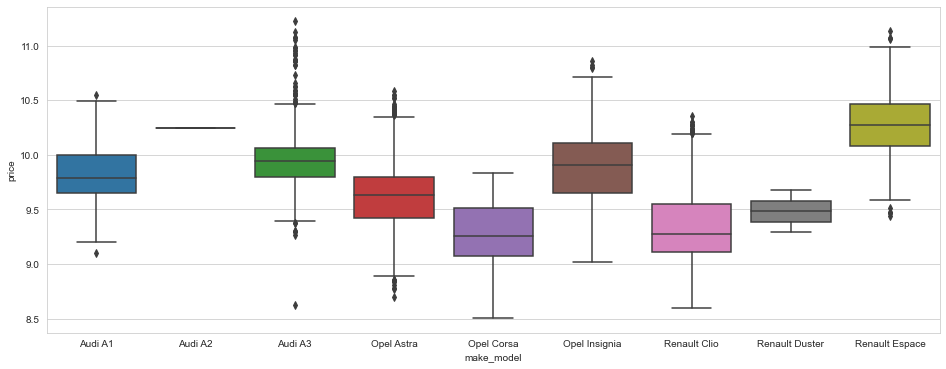

In [77]:
plt.figure(figsize=(16,6))

sns.boxplot(data=df,x="make_model",y=np.log(df.price));

In [78]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Paint Type',
       'Gearing Type', 'Fuel', 'Comfort_Convenience', 'Entertaintment_Media',
       'Extras', 'Safety_Security', 'Gears', 'Age', 'Previous_Owners', 'hp_kw',
       'Inspection_new', 'Upholstery_Type', 'Displacement_cc', 'Weight_kg',
       'Drive_chain', 'cons_comb', 'CO2_Emission'],
      dtype='object')

# make_model

In [79]:
df.make_model.describe()

count       15915
unique          9
top       Audi A3
freq         3097
Name: make_model, dtype: object

In [80]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [81]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Paint Type,Gearing Type,Fuel,Comfort_Convenience,Entertaintment_Media,Extras,Safety_Security,Gears,Age,Previous_Owners,hp_kw,Inspection_new,Upholstery_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission
2614,Audi A2,Off-Road,28200,VAT deductible,26166.0,Employee's car,Metallic,Manual,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.0,1.0,1.0,85.0,0,Cloth,1598.0,1135.0,front,4.9,114.0


In [82]:
df.drop(index=[2614],inplace=True)

In [83]:
df.reset_index(drop=True,inplace=True)

In [84]:
df.shape

(15914, 24)

## Final Step (Checking final situation of data via graphs)

In [85]:
df.head(5).T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0
Type,Used,Used,Used,Used,Used
Paint Type,Metallic,Metallic,Metallic,Metallic,Metallic
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."


In [86]:
numeric_column = 'price,km,Gears,Previous_Owners,cons_comb,Displacement_cc,Age,hp_kw,Weight_kg,CO2_Emission'.split(',')

In [87]:
numeric_column

['price',
 'km',
 'Gears',
 'Previous_Owners',
 'cons_comb',
 'Displacement_cc',
 'Age',
 'hp_kw',
 'Weight_kg',
 'CO2_Emission']

In [88]:
df_numeric = df[numeric_column]

In [89]:
df_numeric

,price,km,Gears,Previous_Owners,cons_comb,Displacement_cc,Age,hp_kw,Weight_kg,CO2_Emission
0,15770,56013.000000,7.0,2.0,3.8,1422.0,3.0,66.0,1220.0,99.0
1,14500,80000.000000,7.0,1.0,5.6,1798.0,2.0,141.0,1255.0,129.0
2,14640,83450.000000,7.0,1.0,3.8,1598.0,3.0,85.0,1135.0,99.0
3,14500,73000.000000,6.0,1.0,3.8,1422.0,3.0,66.0,1195.0,99.0
4,16790,16200.000000,7.0,1.0,4.1,1422.0,3.0,66.0,1135.0,109.0
...,...,...,...,...,...,...,...,...,...,...
15909,39950,1647.362609,6.0,1.0,5.3,1997.0,0.0,147.0,1758.0,139.0
15910,39885,9900.000000,7.0,1.0,7.4,1798.0,0.0,165.0,1708.0,168.0
15911,39875,15.000000,6.0,1.0,5.3,1997.0,0.0,146.0,1734.0,139.0
15912,39700,10.000000,6.0,1.0,5.3,1997.0,0.0,147.0,1758.0,139.0


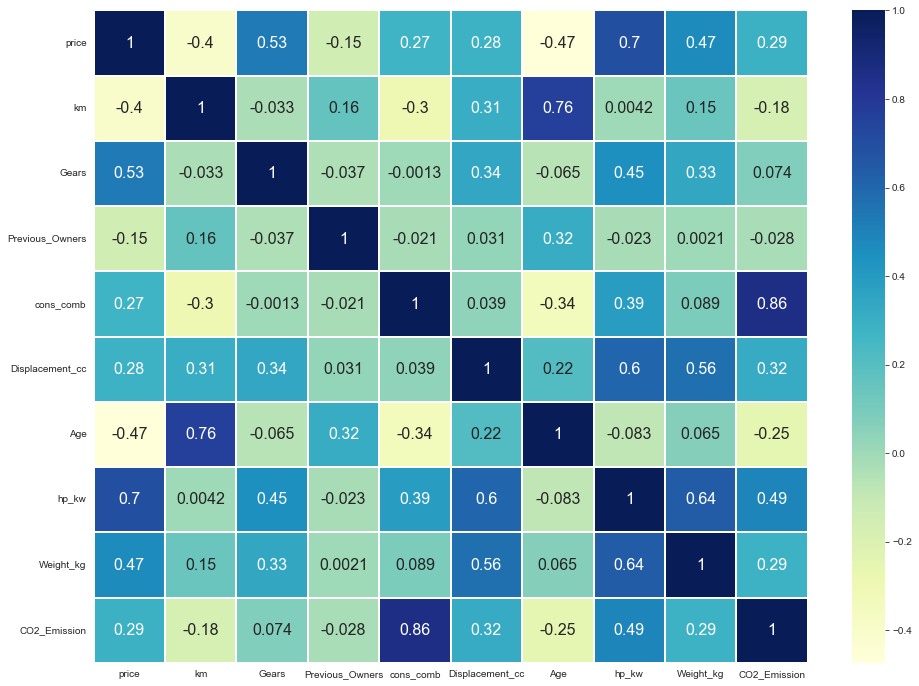

In [90]:
plt.figure(figsize=(16,12))

sns.heatmap(df_numeric.corr(),annot=True,cmap="YlGnBu",fmt=".2g",linewidth = 0.2, annot_kws = {'size' : 16});

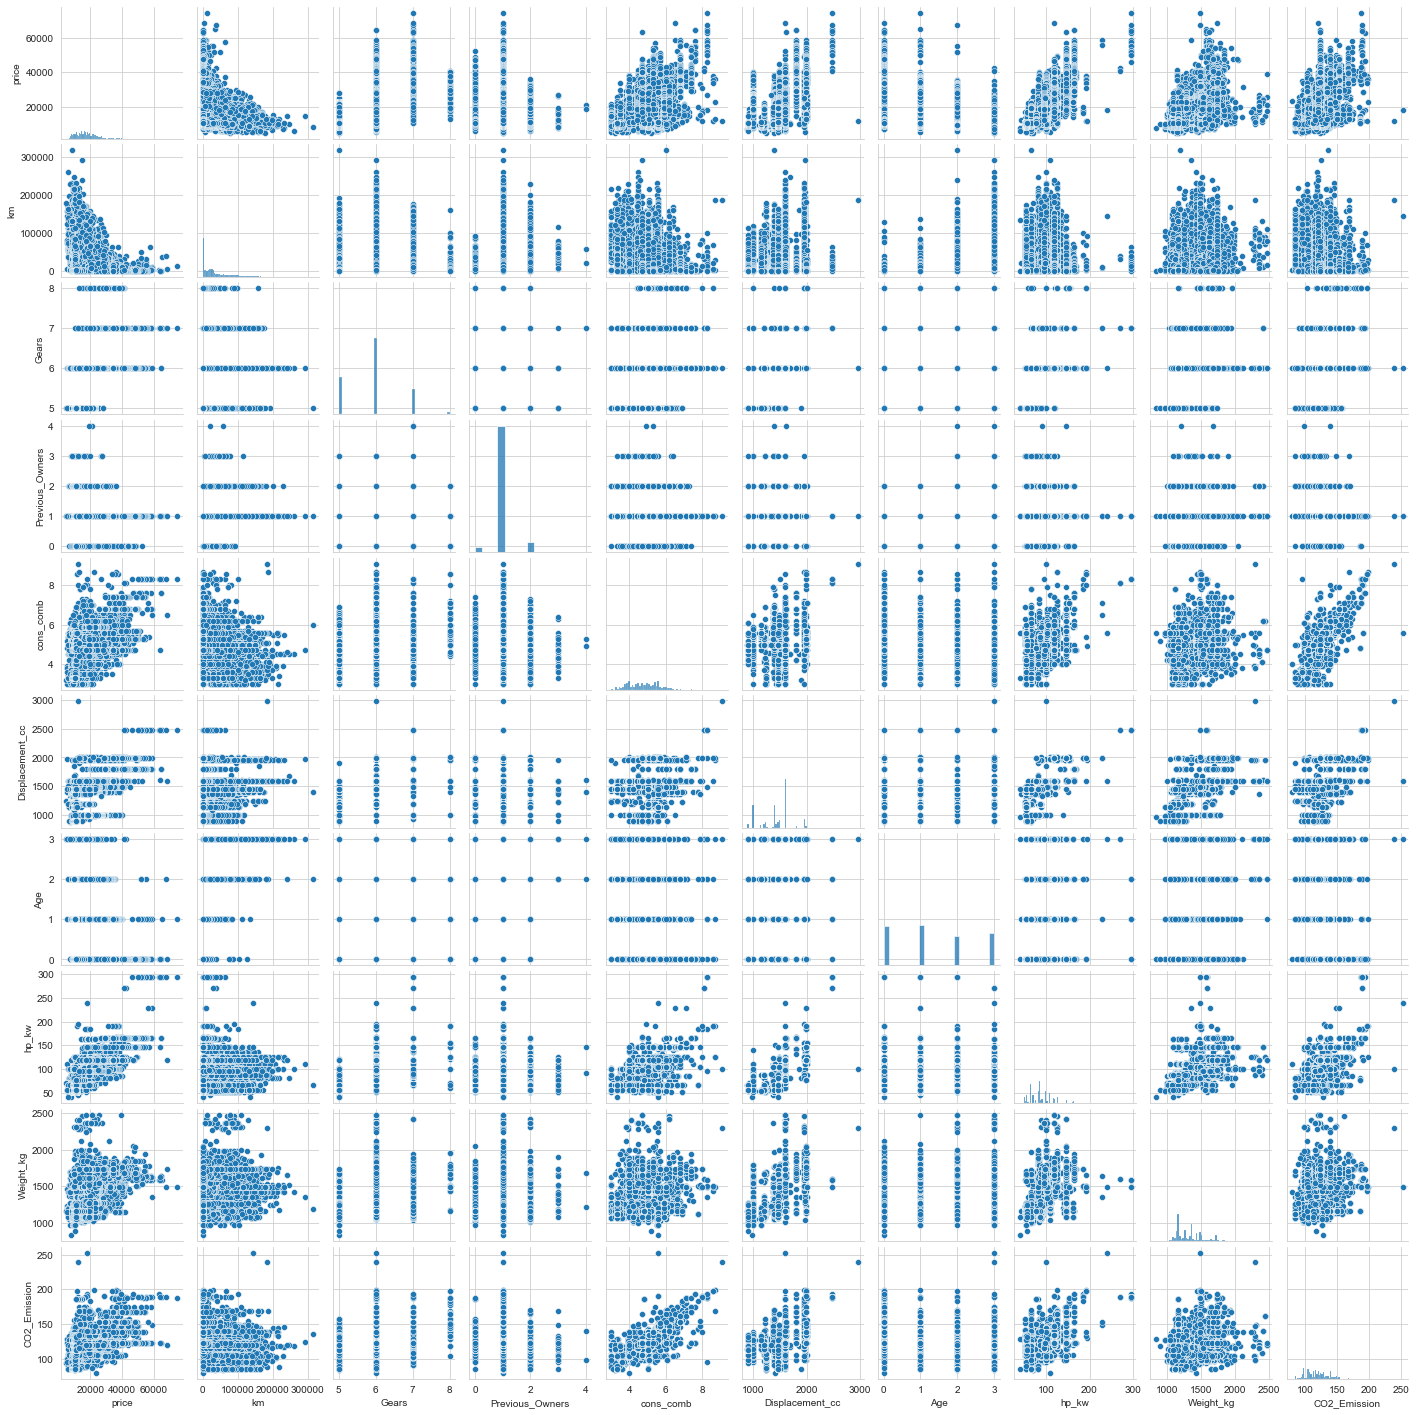

In [91]:
sns.pairplot(df_numeric,size=2);

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15914 entries, 0 to 15913
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make_model            15914 non-null  object 
 1   body_type             15914 non-null  object 
 2   price                 15914 non-null  int64  
 3   vat                   15914 non-null  object 
 4   km                    15914 non-null  float64
 5   Type                  15914 non-null  object 
 6   Paint Type            15914 non-null  object 
 7   Gearing Type          15914 non-null  object 
 8   Fuel                  15914 non-null  object 
 9   Comfort_Convenience   15914 non-null  object 
 10  Entertaintment_Media  15914 non-null  object 
 11  Extras                15914 non-null  object 
 12  Safety_Security       15914 non-null  object 
 13  Gears                 15914 non-null  float64
 14  Age                   15914 non-null  float64
 15  Previous_Owners    

In [93]:
df.shape

(15914, 24)

## Export dataframe to csv file (without dummy)

In [94]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [95]:
df = df.join(df['Comfort_Convenience'].str.get_dummies(sep = ',').add_prefix('cc_'))
df = df.join(df['Entertaintment_Media'].str.get_dummies(sep = ',').add_prefix('em_'))
df = df.join(df['Extras'].str.get_dummies(sep = ',').add_prefix('ex_'))
df = df.join(df['Safety_Security'].str.get_dummies(sep = ',').add_prefix('ss_'))

In [96]:
df.drop(['Comfort_Convenience', 'Entertaintment_Media', 'Extras', 'Safety_Security'], axis = 1, inplace = True)

In [97]:
df.shape

(15914, 114)

In [98]:
df_dummied = pd.get_dummies(df,drop_first=True)

In [99]:
df_dummied.shape

(15914, 134)

In [100]:
df_dummied.head().T

,0,1,2,3,4
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
Gears,7.0,7.0,7.0,6.0,7.0
Age,3.0,2.0,3.0,3.0,3.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0
hp_kw,66.0,141.0,85.0,66.0,66.0
Inspection_new,1.0,0.0,0.0,0.0,1.0
Displacement_cc,1422.0,1798.0,1598.0,1422.0,1422.0
Weight_kg,1220.0,1255.0,1135.0,1195.0,1135.0
cons_comb,3.8,5.6,3.8,3.8,4.1


## Export dataframe to csv file (dummy)

In [101]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)